# Solving a 3 bus system using the DC-approximation

## Imports

In [1]:
import numpy as np

## Line parameters

In [2]:
# Convert impeadance to admittance
Y12 = 1/0.01
Y13 =
Y23 = 

# Set up admmittace array Y
Y = np.array([[ (Y12+Y23), -Y23],[-Y23, Y23+Y13]])
print(Y)

SyntaxError: invalid syntax (3565213737.py, line 3)

## Set up the powers. Note: BASE POWER is 100MVA.

In [ ]:
P = np.array([70, ])/100
print(P)

## $\theta = P * Y^{-1}$

In [ ]:
theta_23 =  np.linalg.solve(
print(theta_23)

## Add $\theta_0 =0 $ to the array

In [ ]:
# Add the angle for bus 0 = 0
theta = np.concatenate(([0.00], theta_23))
print(theta)
print(f"The angle in degrees = {theta *(180.0/np.pi)}")

# Check results

In [ ]:
# Determine line powers
P12 = Y12*(theta[0]- theta[1])
print(P12)

In [ ]:
P13 = 
print(P13)

In [ ]:
P23= 
print(P23)

In [ ]:
# Check to see if powers balance.
P1 = P12+P13
print(P1)

In [ ]:
P2 = -P12
print(P2)

In [ ]:
P3 =
print(P3)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# --- parameters (your choice) ---
thetas = np.arange(0, 190, 10)
Vs_mag = 1.0
Vl_mag = 1.0
X = 0.2

# --- phasors ---
Vs = Vs_mag + 0j          # 1∠0
Vl = Vl_mag*np.cos(np.deg2rad(thetas)) + 1j*Vl_mag*np.sin(np.deg2rad(thetas))
Z  = 0 + 1j*X

In [19]:
I = (Vs - Vl) / Z



In [20]:
Ss=  -1*Vs * np.conj(I)    
Sl = Vl * np.conj(I)   # S at the load
print(Ss)   # S at the source   
print(Sl)   # S at the load 

[0.00000000e+00 +0.j         8.68240888e-01 -0.07596123j
 1.71010072e+00 -0.3015369j  2.50000000e+00 -0.66987298j
 3.21393805e+00 -1.16977778j 3.83022222e+00 -1.78606195j
 4.33012702e+00 -2.5j        4.69846310e+00 -3.28989928j
 4.92403877e+00 -4.13175911j 5.00000000e+00 -5.j
 4.92403877e+00 -5.86824089j 4.69846310e+00 -6.71010072j
 4.33012702e+00 -7.5j        3.83022222e+00 -8.21393805j
 3.21393805e+00 -8.83022222j 2.50000000e+00 -9.33012702j
 1.71010072e+00 -9.6984631j  8.68240888e-01 -9.92403877j
 6.12323400e-16-10.j        ]
[ 0.00000000e+00 +0.j         -8.68240888e-01 -0.07596123j
 -1.71010072e+00 -0.3015369j  -2.50000000e+00 -0.66987298j
 -3.21393805e+00 -1.16977778j -3.83022222e+00 -1.78606195j
 -4.33012702e+00 -2.5j        -4.69846310e+00 -3.28989928j
 -4.92403877e+00 -4.13175911j -5.00000000e+00 -5.j
 -4.92403877e+00 -5.86824089j -4.69846310e+00 -6.71010072j
 -4.33012702e+00 -7.5j        -3.83022222e+00 -8.21393805j
 -3.21393805e+00 -8.83022222j -2.50000000e+00 -9.33012702j
 

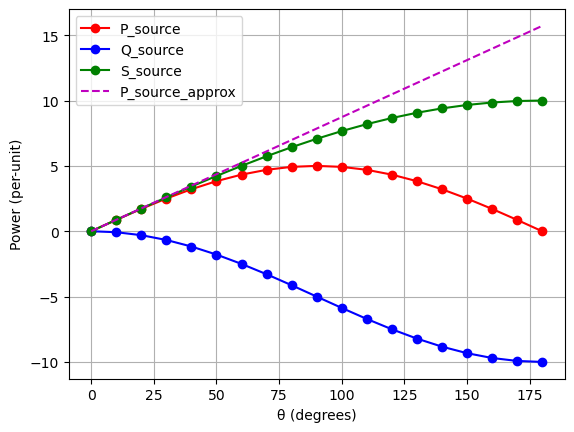

In [25]:
P_s = Ss.real
Q_s = Ss.imag
S_s = np.abs(Ss)   # S at source magnitude, abs means absolute value, which gives magnitude of complex number
#--- linear approximation for P_source --- 

P_s_approx = Vs_mag*Vs_mag/X * np.deg2rad(thetas)
 # linear approximation
plt.plot(thetas, P_s, 'r-o', label='P_source')
plt.plot(thetas, Q_s, 'b-o', label='Q_source')
plt.plot(thetas, S_s, 'g-o', label='S_source')
plt.plot(thetas, P_s_approx, 'm--', label='P_source_approx')
plt.xlabel('θ (degrees)')
plt.ylabel('Power (per-unit)')
plt.legend(); plt.grid(True)